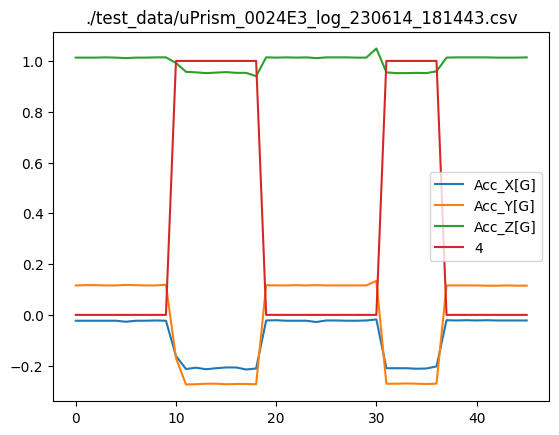

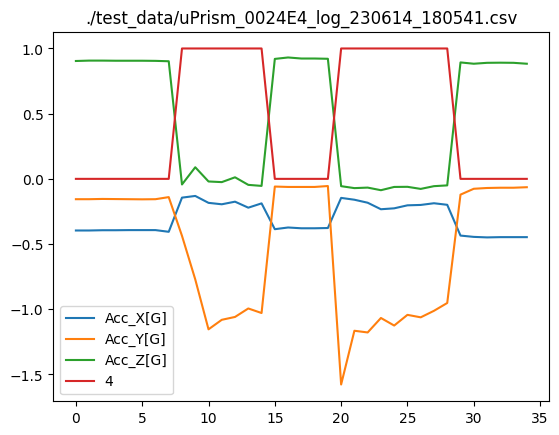

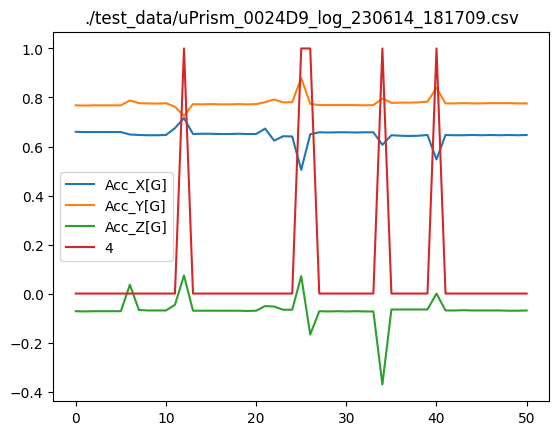

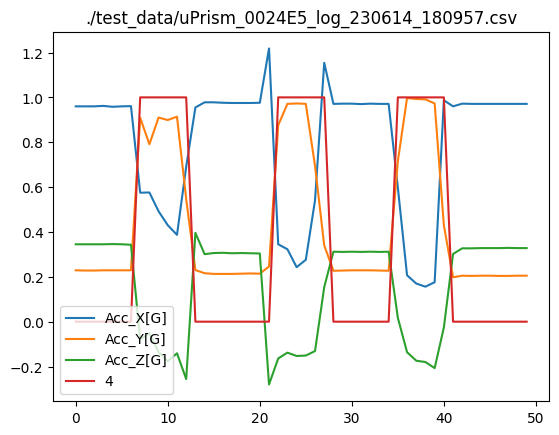

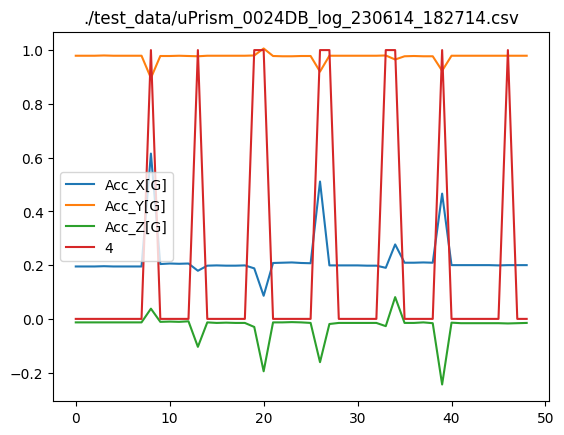

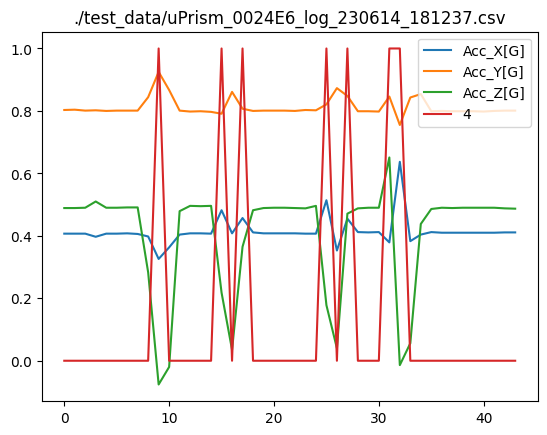

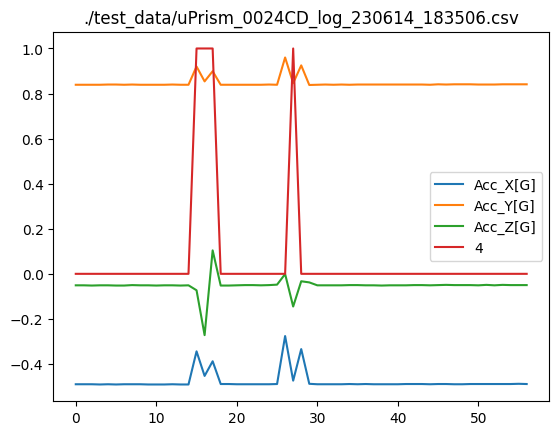

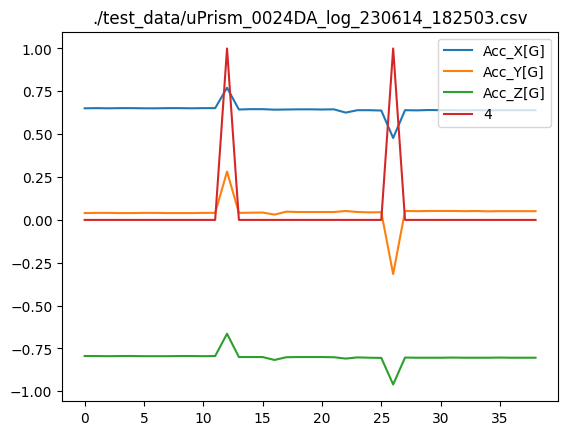

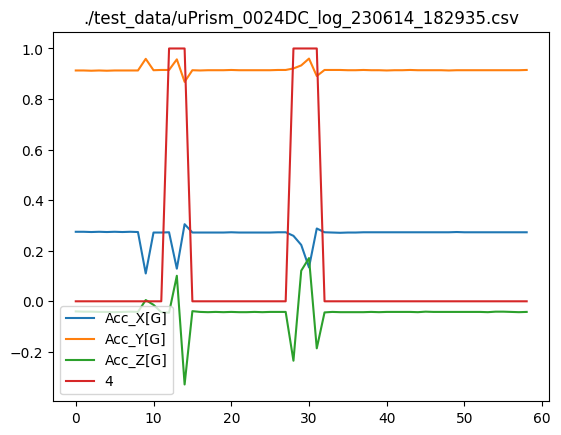

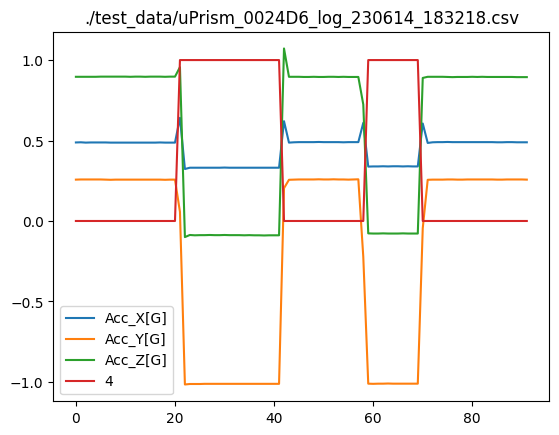

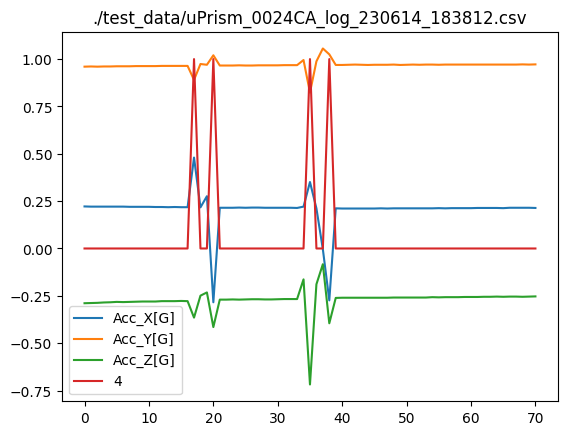

In [50]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

files = glob.glob("./test_data/*")
ave_n = 3
for file in files:
    TH = 1.3
    df = pd.read_csv(file)
    df_tmp = df[["Acc_X[G]","Acc_Y[G]","Acc_Z[G]"]]
    ave_x = abs(sum(list(df["Acc_X[G]"])[:ave_n])/ave_n)
    ave_y = abs(sum(list(df["Acc_Y[G]"])[:ave_n])/ave_n)
    ave_z = abs(sum(list(df["Acc_Z[G]"])[:ave_n])/ave_n)
    tmp = []
    
    if file[-24:-22] == "D9":
        TH = 1.05
    elif file[-24:-22] == "E6":
        TH = 1.1
    elif file[-24:-22] == "DC":
        TH = 1.1
        
    for data in df_tmp.itertuples():
        x = data[1]
        y = data[2]
        z = data[3]
        if abs(x) > ave_x*TH or abs(y) > ave_y*TH or abs(z) > ave_z*TH:
            tmp.append(1)
        else:
            tmp.append(0)
    df_tmp[4] = tmp
    df_tmp.plot(title=file)